显示数据

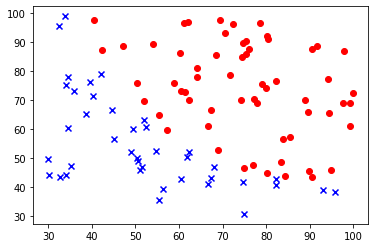

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None)
X = np.insert(np.matrix(data.iloc[:, :-1]), 0, values=1, axis=1)
y = np.matrix(data.iloc[:, -1])
# positive = data.iloc[[i for i in range(data.shape[0]) if data.iloc[i, 2] == 1]]
positive = data[data[2].isin([1])]
negtive = data[data[2].isin([0])]
plt.scatter(positive[0], positive[1], marker='o', color='red')
plt.scatter(negtive[0], negtive[1], marker='x', color='blue')
plt.show()

α= 0.0003， 迭代次数=1000000 可以获得比较好的结果，可以尝试将alpha增大，cost会出现震荡，迭代次数少的话得到的结果不是很好，至少10万次的迭
代效果是不佳的

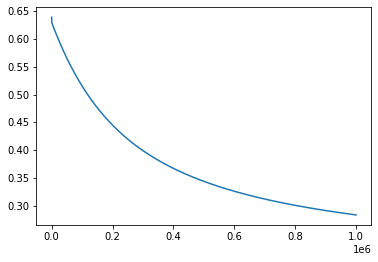

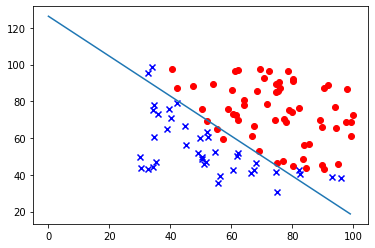

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cost = []
def cost_func(X, y, theta):
    A = sigmoid(X@theta.T)
    B = np.multiply(-y, np.log(A))
    C = np.multiply(-(1-y), np.log(1-A))
    return np.sum(B+C)/X.shape[0]

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_des(X, y, theta, alpha, iters):
    for i in range(iters):
        l_part = sigmoid(X@theta.T) - y
        theta = theta - alpha*(X.T@l_part).T/X.shape[0]
        cost.append(cost_func(X, y, theta))
    return theta

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None)
X = np.insert(np.matrix(data.iloc[:, :-1]), 0, values=1, axis=1)
y = np.matrix(data.iloc[:, data.shape[1]-1:data.shape[1]])
positive = data[data[2].isin([1])]
negtive = data[data[2].isin([0])]

alpha = 0.0003
iters = 1000000
theta = np.matrix(np.zeros(X.shape[1]))
theta = grad_des(X, y, theta, alpha, iters)
plt.plot(np.arange(iters), cost)
plt.show()

x1 = np.arange(100)
plt.scatter(positive[0], positive[1], marker='o', color='red')
plt.scatter(negtive[0], negtive[1], marker='x', color='blue')
plt.plot(x1, -theta[0, 1]/theta[0, 2]*x1-theta[0, 0]/theta[0, 2])
plt.show()

接下来，我们将使用python的库函数完成寻找最优θ的工作，使用的是scipy.optimize.fmin_tnc,弄了才很久成功调用了这个函数，主要问题dataframe与矩阵的索引切片的语法不同，而且gradient函数不知道为什么theta的shape如果不加theta = np.matrix(theta)的话会变成(3,)。关于只传入一个参数给np.zeros函数得到一个shape为(x,)的ndarray，因为只传入了一个参数，即只赋予了一维的个数，所以它不能用转置等操作，它就像一个数组一样。

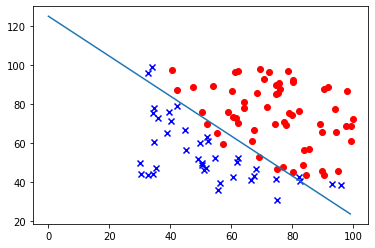

In [236]:
import pandas as pd
import numpy as np
import scipy.optimize as opt

def cost_func(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    A = sigmoid(X@theta.T)
    B = np.multiply((-y),np.log(A))
    C = np.multiply((-(1-y)), np.log(1-A))
    return np.sum(B+C)/X.shape[0]

def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(X.shape[1])
    l_part = sigmoid(X@theta.T) - y
    for i in range(X.shape[1]):
        grad[i] = np.sum(np.multiply(l_part,X[:, i]))/X.shape[0]
    return grad

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None)
X = np.insert(np.array(data.iloc[:, :-1]), 0, values=1, axis=1)
y = np.array(data.iloc[:, data.shape[1]-1:data.shape[1]])
theta = np.zeros(X.shape[1])

result = opt.fmin_tnc(func=cost_func, x0=theta, fprime=gradient, args=(X, y))
x1 = np.arange(100)
plt.scatter(positive[0], positive[1], marker='o', color='red')
plt.scatter(negtive[0], negtive[1], marker='x', color='blue')
plt.plot(x1, -result[0][1]/result[0][2]*x1-result[0][0]/result[0][2])
plt.show()

通过训练出来的模型，我们预测一下如果一个学生两科都为100分，他有多大的概率admitted，结果是0.99999983，还行吧！

In [238]:
import pandas as pd
import numpy as np
import scipy.optimize as opt

def cost_func(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    A = sigmoid(X@theta.T)
    B = np.multiply((-y),np.log(A))
    C = np.multiply((-(1-y)), np.log(1-A))
    return np.sum(B+C)/X.shape[0]

def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(X.shape[1])
    l_part = sigmoid(X@theta.T) - y
    for i in range(X.shape[1]):
        grad[i] = np.sum(np.multiply(l_part,X[:, i]))/X.shape[0]
    return grad

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None)
X = np.insert(np.array(data.iloc[:, :-1]), 0, values=1, axis=1)
y = np.array(data.iloc[:, data.shape[1]-1:data.shape[1]])
theta = np.zeros(X.shape[1])

result = opt.fmin_tnc(func=cost_func, x0=theta, fprime=gradient, args=(X, y))
x = np.array([1,100,100])
print(sigmoid(x@np.matrix(result[0]).T))

[[0.99999983]]


通过可视化数据，我们要用多次项来构建逻辑回归模型，为了防止过拟合，要用正则化了。

In [393]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cost = []
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost_func(theta, lam, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    A = sigmoid(X@theta.T)
    B = np.multiply((-y),np.log(A))
    C = np.multiply((-(1-y)), np.log(1-A))
    return (np.sum(lam*(np.power(theta[0, 1:],2)))/2+np.sum(B+C))/X.shape[0]

def grad_des(X, y, theta, alpha, iters, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = X.shape[1]
    M = X.shape[0]
    for i in range(iters):
        l_part = sigmoid(X@theta.T) - y
        theta[0, 0] = theta[0, 0]-alpha*np.sum(np.multiply(l_part, X[:, 0:1]))/X.shape[0]
        for j in range(1, parameters):
            theta[0, j] = (1-alpha*lam/M)*theta[0, j]-alpha*np.sum(np.multiply(l_part, X[:, j:j+1]))/X.shape[0]
        cost.append(cost_func(theta, lam, X, y))
    return theta

path = 'ex2data2.txt'
data = pd.read_csv(path, header=None)
alpha = 0.003 
iters = 10000
lam = 50
degree = 6
X = np.insert(np.array(data.iloc[:, :-1]), 0, values=1, axis=1)
for i in range(degree+1):
    X = np.insert(X, X.shape[1], values=np.power(X[:, 1], i)*np.power(X[:, 2], degree-i), axis=1)
X= np.delete(X, [1, 2], axis=1)
y = np.array(data.iloc[:, data.shape[1]-1:data.shape[1]])
theta = np.zeros(X.shape[1])

theta = grad_des(X, y, theta, alpha, iters, lam)
print(theta)

[[-0.01708482 -0.08498115 -0.00342393 -0.01641021 -0.00098862 -0.01442777
  -0.00249182 -0.0705222 ]]


又捣鼓了一天，调好之后可以试一下调节λ的值，直观上来说，λ越大拟合的效果会越差，λ越小，拟合的效果会越好，但是泛化能力会较差。

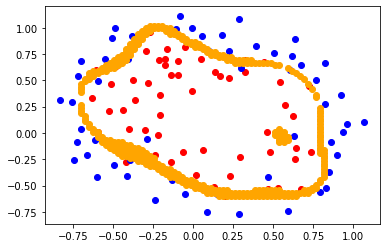

In [392]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost_func(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    A = sigmoid(X@theta.T)
    B = np.multiply((-y),np.log(A))
    C = np.multiply((-(1-y)), np.log(1-A))
    return (lam/2*np.sum(np.power(theta[0,1:],2))+np.sum(B+C))/X.shape[0]

def gradient(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    grad = np.zeros(X.shape[1])
    l_part = sigmoid(X@theta.T) - y
    grad[0] = np.sum(np.multiply(l_part, X[:,0:1]))/X.shape[0]
    for j in range(1, X.shape[1]):
        grad[j] = (np.sum(np.multiply(l_part, X[:, j:j+1]))+lam*theta[0, j])/X.shape[0]
    return grad

def predict(X, y, theta):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    y2 = X@theta.T
    Len = y.shape[0]
    correct = [1 if ((y2[i, 0]>0 and y[i, 0] == 1) or (y2[i, 0]<0 and y[i, 0] == 0)) else 0 for i in range(Len)]
    print(f'accuracy:{np.sum(correct)/Len*100:.2f}%')

def draw_curve(theta, x1, x2):
    y = 0
    place = 0
    for i in range(degree+1):
        for j in range(degree-i+1):
            y += theta[place]*(np.power(x1,i)*np.power(x2,j))
            place += 1
    return y

path = 'ex2data2.txt'
data = pd.read_csv(path, header=None)
lam = 0
degree = 6
X = np.array(data.iloc[:, :-1])

positive = data[data[2]==1]
negtive = data[data[2]==0]
plt.scatter(positive[0], positive[1], color='red')
plt.scatter(negtive[0], negtive[1], color='blue')

for i in range(degree+1):
    for j in range(degree-i+1):
        X = np.insert(X, X.shape[1], values=np.power(X[:, 0], i)*np.power(X[:, 1], j), axis=1)
X = np.delete(X, [0, 1], axis=1)
y = np.array(data.iloc[:, data.shape[1]-1:data.shape[1]])
theta = np.zeros((1,X.shape[1]))
result = opt.fmin_tnc(func=cost_func, x0=theta, fprime=gradient, args=(X,y,lam))
theta = np.array(result[0])

x1 = np.linspace(-1, 1.5, 100)
x2 = np.linspace(-1, 1.5, 100)
cor = [(x, y) for x in x1 for y in x2]
x, y = zip(*cor)
xx = []
yy = []
for x1,x2 in zip(x, y):
    if np.abs(draw_curve(theta, x1, x2)) < 0.7:
        xx.append(x1)
        yy.append(x2)

plt.scatter(xx, yy, color='orange')
plt.show()